Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

Q1. Let your code read the data directly from https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv [0]

In [2]:
input_data = pd.read_csv(r'https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv',skiprows = 0)

In [3]:
# to find the shape of input data
input_data.shape

(762, 79)

In [4]:
# features in input data
input_data.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Genotype', 'Treatment_Behavior'],
      dtype='object')

Q3.Develop a strategy to deal with missing variables. You can choose to impute the variable. The recommended way is to use multivariate feature imputation (https://scikit-learn.org/stable/modules/impute.html) [3]

We begin by dealing with missing values in the dataset.
The features with a large number of null values will be eliminated, while those with a few null values are imputed.

In [5]:
# to find the total missing values
input_data.isnull().sum().sum()

979

In [6]:
# to find missing values column wise
pd.set_option('display.max_rows', 1000)
input_data.isnull().sum()

DYRK1A_N                0
ITSN1_N                 0
BDNF_N                  0
NR1_N                   0
NR2A_N                  0
pAKT_N                  0
pBRAF_N                 0
pCAMKII_N               0
pCREB_N                 0
pELK_N                  0
pERK_N                  0
pJNK_N                  0
PKCA_N                  0
pMEK_N                  0
pNR1_N                  0
pNR2A_N                 0
pNR2B_N                 0
pPKCAB_N                0
pRSK_N                  0
AKT_N                   0
BRAF_N                  0
CAMKII_N                0
CREB_N                  0
ELK_N                  15
ERK_N                   0
GSK3B_N                 0
JNK_N                   0
MEK_N                   4
TRKA_N                  0
RSK_N                   0
APP_N                   0
Bcatenin_N             15
SOD1_N                  0
MTOR_N                  0
P38_N                   0
pMTOR_N                 0
DSCR1_N                 0
AMPKA_N                 0
NR2B_N      

In [7]:
# removing the features from the dataset with over 150 missing values
data = input_data.drop(['EGR1_N','H3MeK4_N','H3AcK18_N','BAD_N','BCL2_N'],axis=1)

In [8]:
# the rest of the data is now prepared for multivariate iputation by removing the labels
data = data[data.columns[0:72]]

In [9]:
# we now import the multivariate imputer for imputing the missign values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
imputed_data=impute_it.fit_transform(data)

In [10]:
# the imputed data is now converted back into a data frame from a numpy array
# also the columns are appropriately named
imputed_data = pd.DataFrame(imputed_data)
imputed_data.columns =['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'CaNA_N']
# we can now observe that the number of null values is zero in all columns       
imputed_data.isnull().sum()

DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
RSK_N              0
APP_N              0
Bcatenin_N         0
SOD1_N             0
MTOR_N             0
P38_N              0
pMTOR_N            0
DSCR1_N            0
AMPKA_N            0
NR2B_N             0
pNUMB_N            0
RAPTOR_N           0
TIAM1_N            0
pP70S6_N           0
NUMB_N             0
P70S6_N            0
pGSK3B_N           0
pPKCG_N            0
CDK5_N       

Q2. Perform exploratory data analysis to find out: [3]

a. Which variables are usable, and which are not?

In [11]:
# below code shows us the different statistical features of the dataset feature wise
pd.set_option('display.max_columns', 100)
imputed_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,0.437715,0.629456,0.319844,2.311905,3.882665,0.232722,0.182514,3.513055,0.212083,1.447201,0.563408,0.313984,0.317911,0.275016,0.830163,0.724154,1.576395,1.517022,0.442247,0.681986,0.390612,0.366676,0.181413,1.185700,2.484394,1.179703,0.243064,0.272915,0.697111,0.169747,0.402036,2.150507,0.511694,0.449822,0.414003,0.758143,0.582631,0.368695,0.565493,0.358045,0.314723,0.416579,0.378833,0.181789,0.949477,0.161692,1.665969,0.294063,0.426788,1.177977,0.211739,0.166781,0.180012,0.122095,0.156554,0.182001,0.208873,0.121018,0.224485,0.126739,0.529005,0.289236,1.533411,2.249525,0.160206,1.234311,0.846778,0.226365,0.122095,0.129460,0.450260,1.357954
std,0.275175,0.274954,0.046536,0.342923,0.929202,0.039521,0.026548,1.268395,0.031066,0.510631,0.374356,0.051136,0.048638,0.043951,0.117761,0.185805,0.271286,0.484032,0.064347,0.126394,0.241190,0.051750,0.024693,0.335133,0.644030,0.260784,0.033697,0.039651,0.119862,0.027955,0.057294,0.424597,0.250096,0.064068,0.093820,0.126097,0.103553,0.059956,0.089922,0.061549,0.051293,0.061814,0.144276,0.029730,0.170739,0.020869,0.544326,0.033127,0.135947,0.341162,0.200499,0.033327,0.018883,0.014928,0.015830,0.025269,0.070190,0.013971,0.036289,0.024685,0.085568,0.030235,0.248073,0.264663,0.024919,0.172950,0.096287,0.029564,0.014928,0.023473,0.062304,0.337107
min,0.170634,0.264085,0.194160,1.414914,1.794716,0.063236,0.064043,1.369898,0.112812,0.429032,0.205696,0.052110,0.191431,0.056818,0.516774,0.305834,0.301609,0.567840,0.095942,0.064421,0.179471,0.232400,0.115505,0.604554,1.131796,0.151124,0.046298,0.124269,0.198743,0.115707,0.247852,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.118491,0.344120,0.099976,0.617325,0.203008,0.130206,0.538934,0.054013,0.116900,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.162642,0.067254,0.071924,0.258626,0.586479
25%,0.294759,0.481011,0.290199,2.069609,3.186726,0.206446,0.165306,2.424669,0.190616,1.213118,0.349142,0.282146,0.284904,0.244118,0.749155,0.593720,1.393049,1.165397,0.403155,0.599010,0.268746,0.335047,0.163125,0.953976,2.023292,1.025634,0.223617,0.248793,0.625876,0.150369,0.366334,1.844433,0.319360,0.408795,0.345086,0.684401,0.532725,0.329607,0.524016,0.317041,0.281749,0.375784,0.265899,0.160235,0.840374,0.149404,1.268677,0.275902,0.318723,0.928572,0.098782,0.148224,0.169066,0.110655,0.146657,0.167245,0.167757,0.112110,0.196765,0.108663,0.472332,0.267836,1.355712,2.086194,0.142209,1.114087,0.798404,0.205750,0.110655,0.111454,0.407385,1.075929
50%,0.371534,0.569058,0.317696,2.309711,3.8

In [12]:
# the variables with a large no of missing values are useless, hence removed earlier

# similarly some of the variables have very small variance through out the dataset
# they can also be removed

# we now identify the variables with variance less than 0.001
# the same are stored in the low_variance_variables
variances = imputed_data.var()
low_variance_variables = variances[variances < 0.001].index
low_variance_variables

Index(['pBRAF_N', 'pCREB_N', 'CREB_N', 'RSK_N', 'NUMB_N', 'pGSK3B_N', 'BAX_N',
       'ARC_N', 'ERBB4_N', 'nNOS_N', 'GFAP_N', 'GluR4_N', 'P3525_N', 'SNCA_N',
       'SHH_N', 'pS6_N', 'pCFOS_N'],
      dtype='object')

In [13]:
# we can now drop these variables from the data
pre_processed_data = imputed_data.drop(low_variance_variables, axis=1)
pre_processed_data.shape
# now only 55 features are remaining in the dataset

(762, 55)

b. Are there significant correlations among variables?

In [14]:
# we will now look for the covariances in between in the variables by plotting the correlation matrix
Correlation_Matrix=pre_processed_data.corr()

Correlation_Matrix

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,P70S6_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,Tau_N,GluR3_N,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,CaNA_N
DYRK1A_N,1.000000,0.961321,0.407110,0.314795,0.340011,-0.182126,-0.158167,0.811398,0.947243,-0.103013,0.314921,-0.044354,0.205584,-0.182104,0.175958,0.412090,0.119124,0.109107,0.965576,0.056534,0.331393,0.418521,0.790566,0.231905,0.278444,0.350443,0.327379,0.323545,-0.346325,-0.158150,-0.382603,-0.145794,-0.062569,0.138090,-0.087466,0.185488,-0.061421,0.096394,-0.169332,0.093947,-0.012035,0.239045,0.157317,0.051321,-0.172208,-0.013024,0.025636,-0.066494,-0.447810,-0.243189,-0.162544,-0.428442,0.339879,-0.035929,0.457907
ITSN1_N,0.961321,1.000000,0.495102,0.428745,0.421034,-0.149509,-0.114789,0.796880,0.907480,-0.030711,0.383070,0.004263,0.309295,-0.105820,0.286931,0.474469,0.169822,0.211762,0.928611,0.087191,0.464710,0.530146,0.848739,0.276242,0.384189,0.478431,0.449891,0.447025,-0.297715,-0.155926,-0.402995,-0.113335,-0.062098,0.181062,-0.063697,0.204842,-0.079715,0.156884,-0.179980,0.217929,0.043417,0.328138,0.256926,0.145029,-0.159201,-0.052091,0.064009,-0.074370,-0.423084,-0.138549,-0.089496,-0.370611,0.403635,0.039384,0.495085
BDNF_N,0.407110,0.495102,1.000000,0.817986,0.746004,0.241501,0.129602,0.458951,0.402443,0.398891,0.720765,0.417686,0.770660,0.320292,0.683693,0.509151,0.286094,0.610763,0.374480,0.509333,0.745848,0.740750,0.683963,0.606736,0.757728,0.798102,0.608840,0.749803,0.013592,0.409300,0.025947,0.398831,0.332032,0.672506,0.484273,0.527297,0.385849,0.537106,-0.039043,0.261115,0.003866,0.444575,0.116897,0.567693,-0.173105,-0.035133,-0.069942,0.038630,-0.235925,0.055620,0.046813,-0.031408,0.235227,0.454025,0.304098
NR1_N,0.314795,0.428745,0.817986,1.000000,0.866667,0.185322,0.253744,0.399791,0.298159,0.411937,0.576011,0.345066,0.946886,0.523509,0.888382,0.405059,0.210898,0.724688,0.253091,0.427675,0.827107,0.798587,0.654146,0.510210,0.702709,0.842872,0.501358,0.928604,0.219092,0.362165,0.007069,0.457466,0.206926,0.596101,0.471611,0.330452,0.204094,0.417143,-0.122171,0.457453,-0.050758,0.395914,0.082524,0.573428,-0.213208,-0.156322,-0.105321,0.179716,-0.151327,0.200738,0.324115,0.074819,0.245469,0.486483,0.205033
NR2A_N,0.340011,0.421034,0.746004,0.866667,1.000000,0.076446,0.223203,0.387644,0.337216,0.349102,0.491323,0.225163,0.864298,0.467339,0.826469,0.343270,0.098400,0.700251,0.261721,0.326014,0.759051,0.834102,0.630792,0.416440,0.574926,0.744543,0.425159,0.878961,0.072769,0.306629,-0.073379,0.417532,0.201728,0.633559,0.433419,0.460531,0.246419,0.443158,-0.229143,0.443068,-0.176370,0.349470,0.069489,0.640294,-0.206458,-0.121213,-0.085087,0.162524,-0.236672,0.129107,0.184531,0.002289,0.117841,0.377628,0.185840
pAKT_N,-0.182126,-0.149509,0.241501,0.185322,0.076446,1.000000,0.425343,-0.008868,-0.182964,0.777901,0.149955,0.873431,0.215411,0.382763,0.241779,-0.181863,0.461807,0.408435,-0.070806,0.757680,-0.125049,-0.063746,-0.059101,0.680435,0.558488,0.306898,0.203672,0.117396,0.367236,0.462826,0.389612,0.562981,0.550537,0.226394,0.504945,0.235706,0.432793,0.271017,0.147383,-0.015094,-0.058747,0.052456,-0.145107,0.072570,-0.075186,0.112829,-0.051799,-0.249927,0.238402,0.118418,0.233412,0.616400,-0.035002,0.199349,-0.245944
pCAMKII_N,-0.158167,-0.114789,0.129602,0.253744,0.223203,0.425343,1.000000,-0.095940,-0.200234,0.522912,0.204270,0.423002,0.281749,0.642607,0.350665,0.001048,0.351124,0.212652,-0.151710,0.274964,0.067475,-0.061983,-0.033313,0.197561,0.258646,0.243661,0.211106,0.289744,0.297057,0.273908,0.351598,0.466618,0.181147,0.100385,0.327120,-0.004928,0.153901,0.135558,0.398960,0.217668,0.260706,-0.033254,-0.040646,0.181306,0.023952,-0.124946,0.007263,0.125428,0.223937,0.219644,0.382236,0

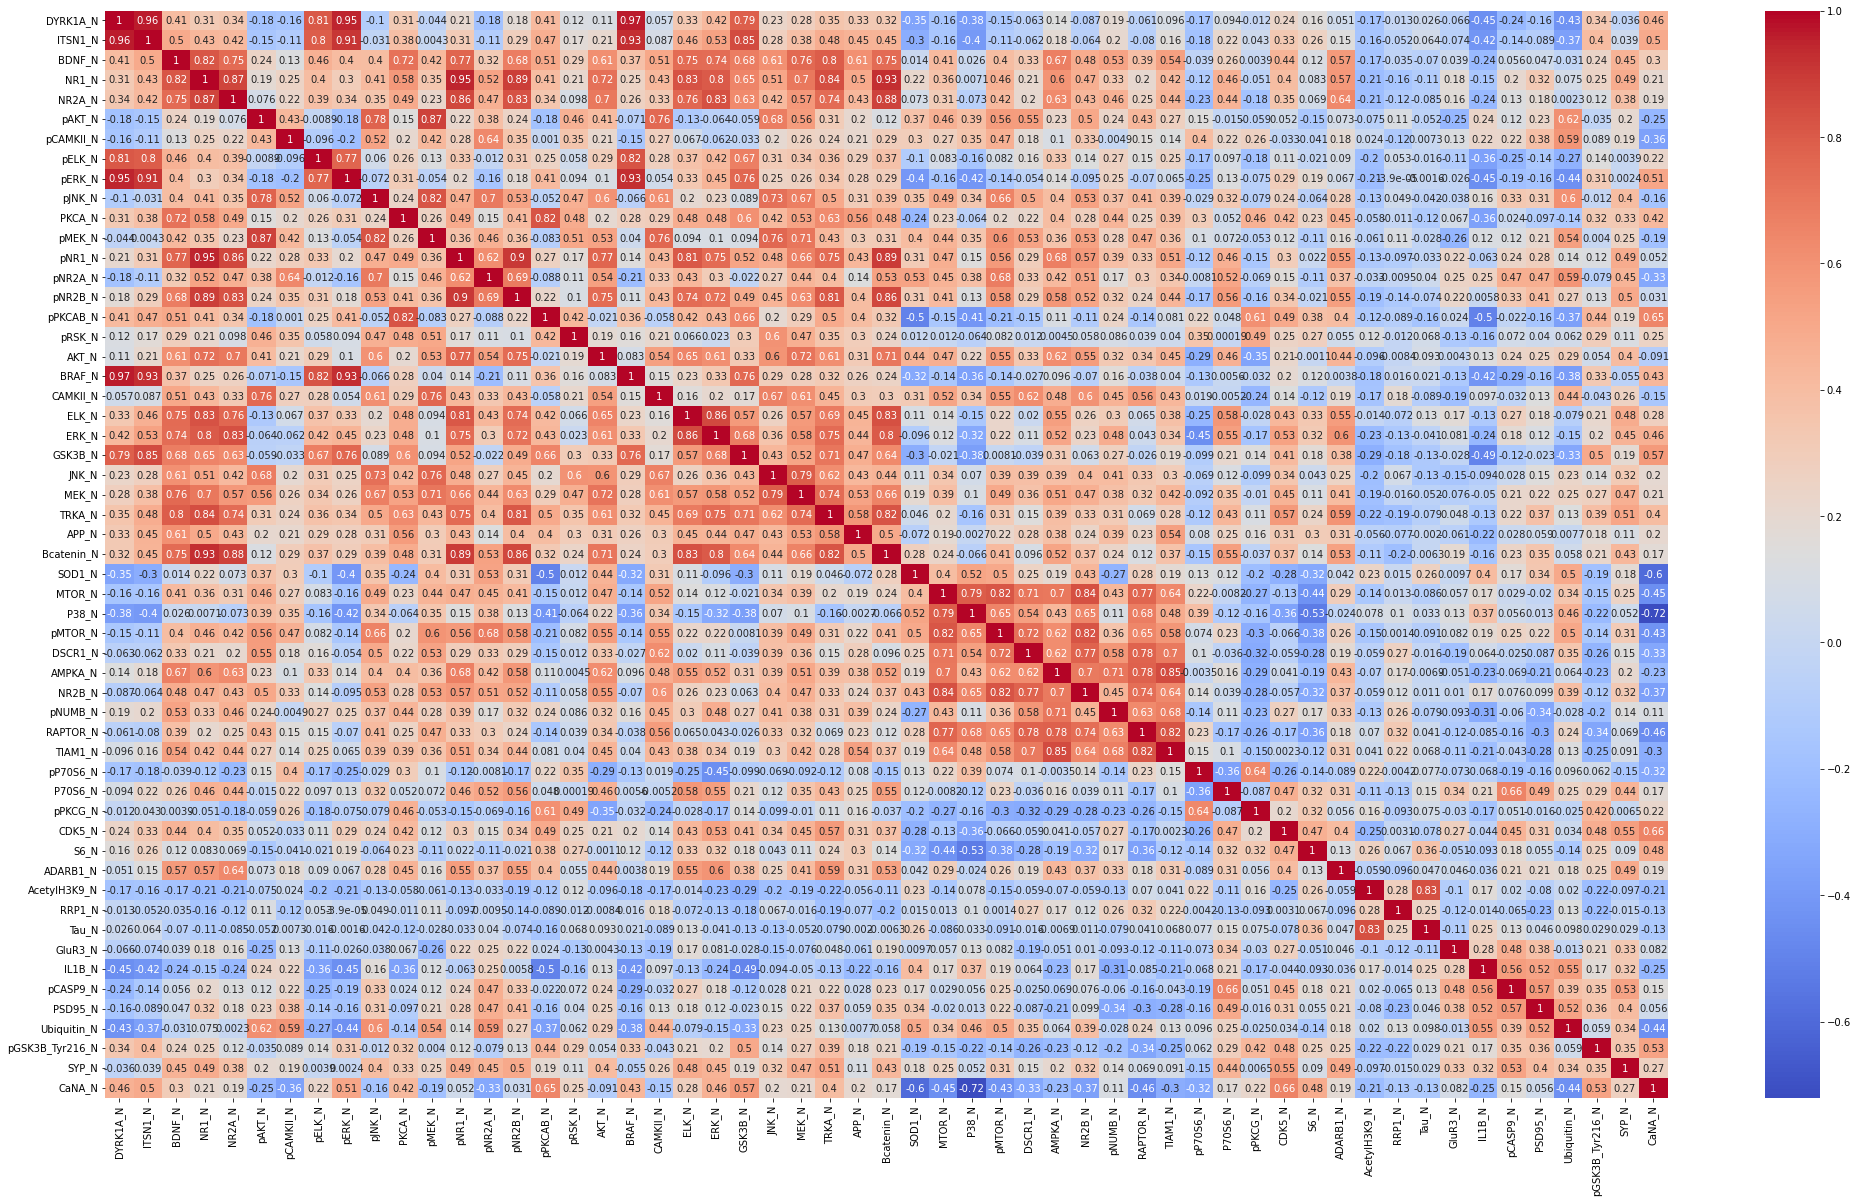

In [15]:
# the same covariance matrix is plotted using seaborn as follows
fig, ax = plt.subplots(figsize=(35, 20))
sns.heatmap(Correlation_Matrix, annot=True, cmap='coolwarm',ax=ax)
plt.show()


In [16]:
# the variables with a very high value of covariance are droped
# we set a threshold at 0.9 & var with covarince higher than 0.9 are stored in to_drop
threshold = 0.9
to_drop = []
for i in range(len(Correlation_Matrix.columns)):
    for j in range(i):
        if abs(Correlation_Matrix.iloc[i, j]) > threshold:
            varname = Correlation_Matrix.columns[i]
            if varname not in to_drop:
                to_drop.append(varname)
to_drop

['ITSN1_N', 'pERK_N', 'pNR1_N', 'pNR2B_N', 'BRAF_N', 'Bcatenin_N']

In [17]:
# these high covariance variables are now droped
pre_processed_data = pre_processed_data.drop(to_drop, axis=1)

In [18]:
# now the data can be normalised using the Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(pre_processed_data), columns=pre_processed_data.columns)

In [19]:
# we can also use min max scalar depending on the distribution of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
min_max_scaled_data = pd.DataFrame(scaler.fit_transform(pre_processed_data), columns=pre_processed_data.columns)

c. Are the classes balanced?

In [20]:
# the classes in the dataset based on the genotype are 
input_data['Genotype'].unique()

array(['Control', 'Ts65Dn'], dtype=object)

In [21]:
# the same can be encoded as 0 & 1 for the purpose of classification
label1 = {'Control': 0,'Ts65Dn': 1}
input_data['Genotype'] = [label1[item] for item in input_data['Genotype']]

In [22]:
# the labels 0 & 1 are assigned to the classes in the dataset
input_data['Genotype'].unique()

array([0, 1])

In [23]:
# the number of the instances in Class 0=435
# while that in Class 1=327
# Hence the dataset is not balanced
input_data['Genotype'].value_counts()[0],input_data['Genotype'].value_counts()[1]

(435, 327)

In [24]:
# similarly there are four classes in the dataset depending on Treatment_Behavior
input_data['Treatment_Behavior'].unique()

array(['Memantine_C/S', 'Memantine_S/C', 'Saline_C/S', 'Saline_S/C'],
      dtype=object)

In [25]:
# the same are encoded as follows into 0,1,2,3
label2 = {'Memantine_C/S': 0, 'Memantine_S/C':1, 'Saline_C/S':2, 'Saline_S/C':3}
input_data['Treatment_Behavior'] = [label2[item] for item in input_data['Treatment_Behavior']]

In [26]:
input_data['Treatment_Behavior'].unique()

array([0, 1, 2, 3])

In [27]:
# the number of the samples belonging to differnet instances is not the same
# hence the datatset is not balanced
input_data['Treatment_Behavior'].value_counts()[0],input_data['Treatment_Behavior'].value_counts()[1],input_data['Treatment_Behavior'].value_counts()[2],input_data['Treatment_Behavior'].value_counts()[3]

(225, 225, 180, 132)

In [28]:
# we can now put all the data together in a common dataframe 
data=pre_processed_data
data['Genotype']=input_data['Genotype']
data['Treatment_Behavior']=input_data['Treatment_Behavior']

Q3. Develop a strategy to deal with missing variables. You can choose to impute the variable. The recommended way is to use multivariate feature imputation. 

Done in first step.

4. Select metrics that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc. Remember, you have two separate classification tasks – one is binary, the other has four classes. You may have to do some reading about multi-class classification metrics. 

We will be using the metrics including Accuracy, Precision, Recall, F1 Score, to evaluate the performance of the models built.

All these metrics are included in the classification report in scikit learn

All models are then followed by a Confusion Matrix to find the distribution of TP, FP, TN, FN

5. Using five-fold cross-validation (you can use GridSearchCV from scikit-learn) to find the reasonable (I cannot say “best” because you have two separate classifications to perform) hyper-parameter settings for the following model types:

All Models are now implemented separately for the two classification tasks

6. Check feature importance for each model to see if the same proteins are important for each model. Read up on how to find feature importance. [3]

The feature importance check is performed for all models in the same Code cell after implementation of the model.

a. Linear SVM with regularization as hyperparameter [2]

{'C': 0.15}
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       138
           1       0.97      0.95      0.96        91

    accuracy                           0.97       229
   macro avg       0.97      0.96      0.96       229
weighted avg       0.97      0.97      0.96       229



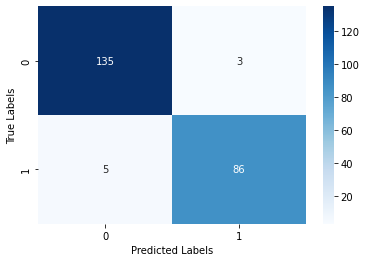

Feature 0: 0.3585297610533454
Feature 1: 0.244084104815855
Feature 2: 0.2934564040725143
Feature 3: 0.09773670166846726
Feature 4: 0.40284215263647205
Feature 5: 0.3518411060312556
Feature 6: 0.07060317082065908
Feature 7: 0.11070026294991178
Feature 8: 0.3967369461057579
Feature 9: 0.20774659140152885
Feature 10: 0.18327772589779506
Feature 11: 0.01049344637233408
Feature 12: 0.2576911647250385
Feature 13: 0.21094299238900904
Feature 14: 0.3300821123022887
Feature 15: 0.26691521940190405
Feature 16: 0.819553750241754
Feature 17: 0.026893595942197195
Feature 18: 0.038691954388295736
Feature 19: 0.13567261832974967
Feature 20: 0.8809831718566097
Feature 21: 0.7111693889642363
Feature 22: 0.01759706998914906
Feature 23: 0.47594350372447963
Feature 24: 0.4566521842684725
Feature 25: 0.19648824322714803
Feature 26: 0.5616182881332964
Feature 27: 0.43051100344647786
Feature 28: 0.35058449510561407
Feature 29: 0.512753282409601
Feature 30: 0.25833226600986
Feature 31: 0.7925783344391527
Feat

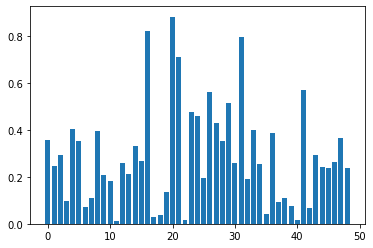

In [29]:
#SVM
#Classification 1
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# perform a train test split
X_train, X_val, y_train, y_val = train_test_split(
                        normalized_data, input_data['Genotype'],
                        test_size = 0.3, random_state = 42)

# using 5 fold cv only on training set
# then evaluate on separate val set 
Linear_SVM_1 = LinearSVC(max_iter=10000)
param_grid = {'C': [0.1, 0.15, 0.2, 0.25, 0.33, 0.35]}
grid = GridSearchCV(Linear_SVM_1, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
Best_Linear_SVM_1 = grid.best_estimator_

Best_Linear_SVM_1.fit(X_train,y_train)

predictions=Best_Linear_SVM_1.predict(X_val)
print(classification_report(y_val, predictions))

cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Impt_Feat_Linear_SVM_1= abs(Best_Linear_SVM_1.coef_)
# print feature importance scores
for i, score in enumerate(Impt_Feat_Linear_SVM_1[0]):
    print(f"Feature {i}: {score}")

# plot feature importance
plt.bar([x for x in range(len(Impt_Feat_Linear_SVM_1[0]))], Impt_Feat_Linear_SVM_1[0])
plt.show()

{'C': 0.85}
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.99      1.00      0.99        67
           2       0.94      0.96      0.95        52
           3       1.00      0.92      0.96        39

    accuracy                           0.97       229
   macro avg       0.97      0.96      0.96       229
weighted avg       0.97      0.97      0.97       229



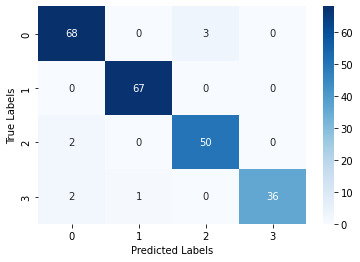

Feature 0: 0.09380434817437565
Feature 1: 0.5184727036221745
Feature 2: 0.4645922831118109
Feature 3: 0.7651587955420817
Feature 4: 0.5129827388056157
Feature 5: 0.06938555070532633
Feature 6: 0.04510162017219769
Feature 7: 0.9921084061268937
Feature 8: 0.5733294685640523
Feature 9: 0.18384894621941317
Feature 10: 0.3104294173907217
Feature 11: 1.23149989107894
Feature 12: 0.3856962413134089
Feature 13: 0.5733006013543044
Feature 14: 1.2422378043282112
Feature 15: 0.16326437091875998
Feature 16: 0.8706364445540438
Feature 17: 0.4712374859917012
Feature 18: 0.19835100235517167
Feature 19: 0.6045728271815578
Feature 20: 1.048853637908679
Feature 21: 0.929363879871117
Feature 22: 2.9149710827734405
Feature 23: 1.0690800992922262
Feature 24: 0.5155557423131765
Feature 25: 0.37909573943638164
Feature 26: 0.42890291268643954
Feature 27: 0.2705832266553995
Feature 28: 0.39608054478585236
Feature 29: 0.1126354115523039
Feature 30: 0.5694775109079138
Feature 31: 0.5884439265395386
Feature 32: 0

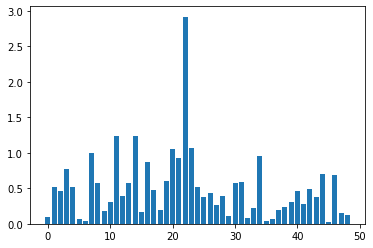

In [30]:
#SVM
#Classification 2
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, X_val, y_train, y_val = train_test_split(
                        normalized_data, input_data['Treatment_Behavior'],
                test_size = 0.3, random_state = 101)
Linear_SVM_2 = LinearSVC(max_iter=10000)
param_grid = {'C': [0.8, 0.85, 0.9, 0.95, 1.0]}
grid = GridSearchCV(Linear_SVM_2, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
Best_Linear_SVM_2 = grid.best_estimator_

Best_Linear_SVM_2.fit(X_train,y_train)

predictions=Best_Linear_SVM_2.predict(X_val)
print(classification_report(y_val, predictions))

cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Impt_Feat_Linear_SVM_2= abs(Best_Linear_SVM_2.coef_)
# print feature importance scores
for i, score in enumerate(Impt_Feat_Linear_SVM_2[0]):
    print(f"Feature {i}: {score}")

# plot feature importance
plt.bar([x for x in range(len(Impt_Feat_Linear_SVM_2[0]))], Impt_Feat_Linear_SVM_2[0])
plt.show()

b. RBF kernel SVM with kernel width and regularization as hyperparameters [2]


Best hyperparameters:  {'C': 5.0, 'gamma': 0.01}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00        91

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



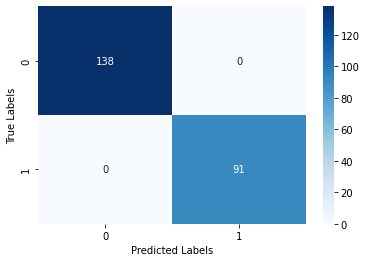

Feature 0: 0.0017467248908296985
Feature 1: 0.0017467248908296985
Feature 2: 0.0029112081513828305
Feature 3: 0.00029112081513828306
Feature 4: 0.004366812227074246
Feature 5: 0.004803493449781671
Feature 6: 0.00029112081513828306
Feature 7: 0.00014556040756914153
Feature 8: 0.007714701601164501
Feature 9: 0.002183406113537123
Feature 10: 0.005822416302765661
Feature 11: 0.003493449781659397
Feature 12: 0.0011644832605531322
Feature 13: 0.00029112081513828306
Feature 14: 0.0007278020378457076
Feature 15: 0.002765647743813689
Feature 16: 0.00567685589519652
Feature 17: 0.0004366812227074246
Feature 18: 0.0014556040756914153
Feature 19: 0.0007278020378457076
Feature 20: 0.013828238719068445
Feature 21: 0.1014556040756914
Feature 22: 0.0
Feature 23: 0.009752547307132483
Feature 24: 0.0020378457059679815
Feature 25: 0.0
Feature 26: 0.021397379912663758
Feature 27: 0.009898107714701624
Feature 28: 0.0007278020378457076
Feature 29: 0.004366812227074246
Feature 30: 0.003056768558951972
Featur

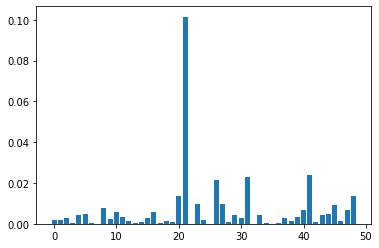

In [31]:
#SVM with RBF Kernel
# Classification 1
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn.svm import SVC

X_train, X_val, y_train, y_val = train_test_split(
                        normalized_data, np.ravel(input_data['Genotype']),
                test_size = 0.3, random_state = 42)
param_grid = {'C': [0.1, 0.5, 1.0, 2.0, 3.0, 5.0],
              'gamma': [0.001, 0.01, 0.1, 1, 10 ]}

# Define the SVM with RBF kernel
Kernel_SVM_1 = SVC(kernel='rbf')

# Define the KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True)

# Define the GridSearchCV object
grid = GridSearchCV(estimator=Kernel_SVM_1, param_grid=param_grid, cv=kf)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

Best_Kernel_SVM_1 = grid.best_estimator_

Best_Kernel_SVM_1.fit(X_train,y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)
predictions=Best_Kernel_SVM_1.predict(X_val)
print(classification_report(y_val, predictions))

cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Impt_Feat_Kernel_SVM_1 = permutation_importance(Best_Kernel_SVM_1, X_val, y_val, n_repeats=30, random_state=42)

# print feature importance scores
for i, score in enumerate(Impt_Feat_Kernel_SVM_1.importances_mean):
    print(f"Feature {i}: {score}")

# plot feature importance
plt.bar([x for x in range(len(Impt_Feat_Kernel_SVM_1.importances_mean))], abs(Impt_Feat_Kernel_SVM_1.importances_mean))
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        65
           2       0.98      1.00      0.99        50
           3       1.00      0.98      0.99        44

    accuracy                           1.00       229
   macro avg       1.00      0.99      0.99       229
weighted avg       1.00      1.00      1.00       229



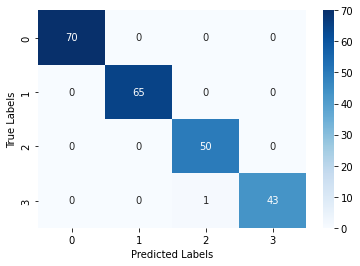

Feature 0: 0.004803493449781671
Feature 1: 0.017176128093158674
Feature 2: 0.00014556040756914153
Feature 3: 0.015283842794759842
Feature 4: 0.00014556040756914153
Feature 5: 0.02052401746724889
Feature 6: 0.009024745269286776
Feature 7: 0.0023289665211062645
Feature 8: 0.0007278020378457076
Feature 9: 0.0004366812227074246
Feature 10: 0.00014556040756914153
Feature 11: 0.006986899563318794
Feature 12: 0.0004366812227074246
Feature 13: 0.002183406113537123
Feature 14: 0.0068413391557496485
Feature 15: 0.0016011644832605568
Feature 16: 0.00014556040756914153
Feature 17: 0.00014556040756914153
Feature 18: 0.005531295487627378
Feature 19: 0.00029112081513828306
Feature 20: 0.009461426491994199
Feature 21: 0.01149927219796217
Feature 22: 0.002183406113537123
Feature 23: 0.0017467248908296985
Feature 24: 0.0005822416302765661
Feature 25: 0.0007278020378457076
Feature 26: 0.00014556040756914153
Feature 27: 0.0
Feature 28: 0.0007278020378457076
Feature 29: 0.011062590975254753
Feature 30: 0.0

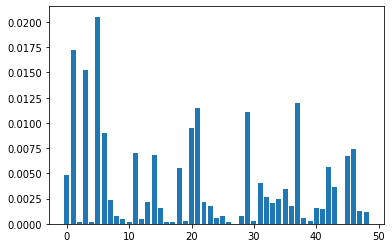

In [32]:
#SVM with RBF Kernel
# Classification 2
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC

X_train, X_val, y_train, y_val = train_test_split(
                        normalized_data, input_data['Treatment_Behavior'],
                test_size = 0.3, random_state = 42)
param_grid = {'C': [1.0, 2.0, 2.5, 4.0, 5.0],
              'gamma': [0.01, 0.1, 0.2, 0.5, 1]}

# Define the SVM with RBF kernel
Kernel_SVM_2 = SVC(kernel='rbf')

# Define the KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True)

# Define the GridSearchCV object
grid = GridSearchCV(estimator=Kernel_SVM_2, param_grid=param_grid, cv=kf)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

Best_Kernel_SVM_2 = grid.best_estimator_

Best_Kernel_SVM_2.fit(X_train,y_train)

# Print the best hyperparameters
#print("Best hyperparameters: ", grid.best_params_)
predictions=Best_Kernel_SVM_2.predict(X_val)
print(classification_report(y_val, predictions))


cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Impt_Feat_Kernel_SVM_2 = permutation_importance(Best_Kernel_SVM_2, X_val, y_val, n_repeats=30, random_state=42)

# print feature importance scores
for i, score in enumerate(Impt_Feat_Kernel_SVM_2.importances_mean):
    print(f"Feature {i}: {score}")

# plot feature importance
plt.bar([x for x in range(len(Impt_Feat_Kernel_SVM_2.importances_mean))], abs(Impt_Feat_Kernel_SVM_2.importances_mean))
plt.show()

c. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of
neurons, weight decay)

Best parameters:  {'alpha': 0.1, 'hidden_layer_sizes': (16,)}
Best score:  0.9868277199788397
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       138
           1       0.99      1.00      0.99        91

    accuracy                           1.00       229
   macro avg       0.99      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



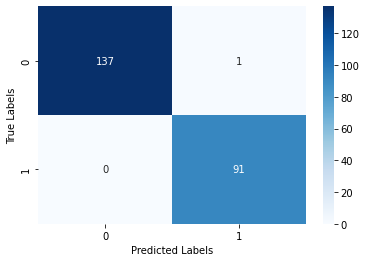

Feature 0: 0.002183406113537123
Feature 1: 0.003930131004366821
Feature 2: 0.004803493449781671
Feature 3: 0.002183406113537123
Feature 4: 0.008733624454148492
Feature 5: 0.004803493449781671
Feature 6: 0.0
Feature 7: 0.0004366812227074246
Feature 8: 0.0004366812227074246
Feature 9: 0.0
Feature 10: 0.004803493449781671
Feature 11: 0.0004366812227074246
Feature 12: 0.0
Feature 13: 0.010917030567685615
Feature 14: 0.010917030567685605
Feature 15: 0.006113537117903944
Feature 16: 0.01965065502183405
Feature 17: 0.0
Feature 18: 0.0
Feature 19: 0.0004366812227074246
Feature 20: 0.02270742358078599
Feature 21: 0.06069868995633186
Feature 22: 0.003056768558951972
Feature 23: 0.023144104803493402
Feature 24: 0.0013100436681222738
Feature 25: 0.007423580786026218
Feature 26: 0.03056768558951962
Feature 27: 0.0183406113537118
Feature 28: 0.009606986899563342
Feature 29: 0.003493449781659397
Feature 30: 0.01353711790393015
Feature 31: 0.07598253275109168
Feature 32: 0.0013100436681222738
Feature 

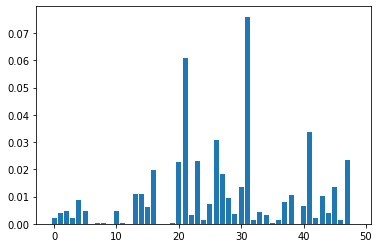

In [33]:
#NN 
# Classification 1
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


param_grid = {'hidden_layer_sizes': [(2,),(4,), (8,), (16,)],
              'alpha': [0.001, 0.01, 0.1, 1, 1.1]}

X_train, X_val, y_train, y_val = train_test_split(
                        normalized_data, np.ravel(input_data['Genotype']),
                test_size = 0.3, random_state =42)

# Define the neural network with a single ReLU hidden layer and Softmax output
NN_1 = MLPClassifier(activation='relu', solver='adam',max_iter=10000, random_state=42)

# Define the KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True)

# Define the GridSearchCV object
grid = GridSearchCV(estimator=NN_1, param_grid=param_grid, cv=kf)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

Best_NN_1 = grid.best_estimator_

Best_NN_1.fit(X_train,y_train)

# Print the best parameters and best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

predictions=Best_NN_1.predict(X_val)
print(classification_report(y_val, predictions))

cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

result = permutation_importance(Best_NN_1, X_val, y_val, n_repeats=10, random_state=42)

Impt_Feat_Best_NN_1 = result.importances_mean
for i in range(len(Impt_Feat_Best_NN_1)):
    print(f"Feature {i}: {Impt_Feat_Best_NN_1[i]}")

# Create a horizontal bar plot of the feature importance scores
plt.bar([x for x in range(len(Impt_Feat_Best_NN_1))], Impt_Feat_Best_NN_1)
plt.show()

Best parameters:  {'alpha': 1, 'hidden_layer_sizes': (16,)}
Best score:  0.9925057309116558
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        44

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



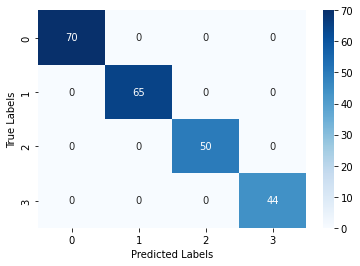

Feature 0: 0.0004366812227074246
Feature 1: 0.04192139737991265
Feature 2: 0.0004366812227074246
Feature 3: 0.026637554585152833
Feature 4: 0.0004366812227074246
Feature 5: 0.03449781659388647
Feature 6: 0.013100436681222738
Feature 7: 0.007423580786026218
Feature 8: 0.007860262008733642
Feature 9: 0.0004366812227074246
Feature 10: 0.0008733624454148492
Feature 11: 0.043231441048034926
Feature 12: 0.0004366812227074246
Feature 13: 0.017030567685589536
Feature 14: 0.04192139737991266
Feature 15: 0.006986899563318794
Feature 16: 0.0
Feature 17: 0.0013100436681222738
Feature 18: 0.00567685589519652
Feature 19: 0.01048034934497819
Feature 20: 0.015283842794759838
Feature 21: 0.03886462882096068
Feature 22: 0.017467248908296974
Feature 23: 0.014410480349345011
Feature 24: 0.002183406113537123
Feature 25: 0.0
Feature 26: 0.002183406113537123
Feature 27: 0.0004366812227074246
Feature 28: 0.0013100436681222738
Feature 29: 0.013973799126637588
Feature 30: 0.0008733624454148492
Feature 31: 0.009

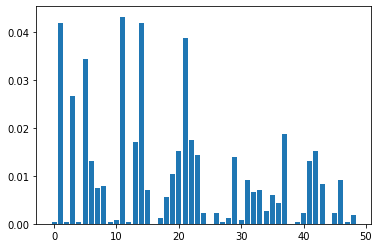

In [34]:
#NN 
# Classification 2
from sklearn.neural_network import MLPClassifier

param_grid = {'hidden_layer_sizes': [(2,), (4,), (8,), (16,)],
              'alpha': [0.001, 0.01, 0.1, 1, 1.1]}

X_train, X_val, y_train, y_val = train_test_split(
                        normalized_data, np.ravel(input_data['Treatment_Behavior']),
                test_size = 0.3, random_state = 42)

# Define the neural network with a single ReLU hidden layer and Softmax output
NN_2 = MLPClassifier(activation='relu', solver='adam', max_iter=10000, random_state=42)

# Define the KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True)

# Define the GridSearchCV object
grid = GridSearchCV(estimator=NN_2, param_grid=param_grid, cv=kf)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

Best_NN_2=grid.best_estimator_
Best_NN_2.fit(X_train,y_train)

# Print the best parameters and best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

predictions=Best_NN_2.predict(X_val)
print(classification_report(y_val, predictions))

cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

result = permutation_importance(Best_NN_2, X_val, y_val, n_repeats=10, random_state=42)

Impt_Feat_Best_NN_2 = result.importances_mean
for i in range(len(Impt_Feat_Best_NN_2)):
    print(f"Feature {i}: {Impt_Feat_Best_NN_2[i]}")

# Create a horizontal bar plot of the feature importance scores
plt.bar([x for x in range(len(Impt_Feat_Best_NN_2))], Impt_Feat_Best_NN_2)
plt.show()


d. Random forest (max tree depth, max number of variables per node) [2]

Best hyperparameters:  {'max_depth': 20, 'max_features': 'sqrt'}
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       138
           1       0.96      0.96      0.96        91

    accuracy                           0.97       229
   macro avg       0.96      0.96      0.96       229
weighted avg       0.97      0.97      0.97       229



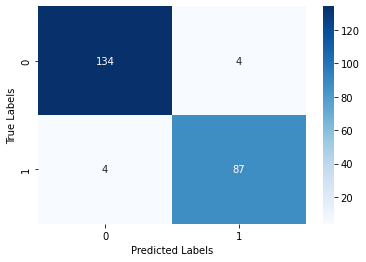

Feature 0: 0.02993494105450811
Feature 1: 0.012450591320911796
Feature 2: 0.01176363545374168
Feature 3: 0.01151711143541391
Feature 4: 0.014392316751610406
Feature 5: 0.013678976916236868
Feature 6: 0.014670397156153321
Feature 7: 0.0113450360962632
Feature 8: 0.009368125745699098
Feature 9: 0.009246079349671345
Feature 10: 0.007130869220974312
Feature 11: 0.01791171792448461
Feature 12: 0.011007619573351802
Feature 13: 0.013238251422697625
Feature 14: 0.010821812867623933
Feature 15: 0.01253955992461173
Feature 16: 0.010269829497251769
Feature 17: 0.015192722592945651
Feature 18: 0.010486943137948358
Feature 19: 0.009033005784164926
Feature 20: 0.014070710349310765
Feature 21: 0.13660371486620754
Feature 22: 0.013908432098686058
Feature 23: 0.023173504769485428
Feature 24: 0.023908070148590366
Feature 25: 0.023668694604282867
Feature 26: 0.01384812047118562
Feature 27: 0.023572209961284903
Feature 28: 0.02194322619173514
Feature 29: 0.014398230510283284
Feature 30: 0.0205002436341584

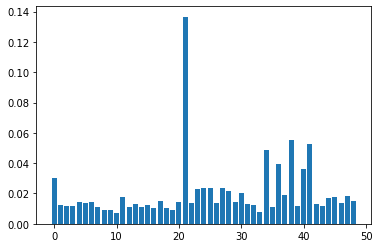

In [35]:
# Random Forest
# Classification 1
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
param_grid = {
    'max_depth': [5, 10, 15, 20 ,25],
    'max_features': [0.5,'sqrt', 'log2', None]
}

X_train, X_val, y_train, y_val = train_test_split(
                        normalized_data, input_data['Genotype'],
                test_size = 0.3, random_state =42)
# Create a Random Forest classifier
RF_1 = RandomForestClassifier()
# Use GridSearchCV with 5-fold cross-validation to find the best hyperparameters
grid = GridSearchCV(RF_1, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
# Print the best hyperparameters found
print("Best hyperparameters: ", grid.best_params_)

Best_RF_1 = grid.best_estimator_
Best_RF_1.fit(X_train, y_train)

predictions = Best_RF_1.predict(X_val)
print(classification_report(y_val, predictions))


cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate the feature importance
Impt_Feat_Best_RF_1 = Best_RF_1.feature_importances_

for i in range(len(Impt_Feat_Best_RF_1)):
    print(f"Feature {i}: {Impt_Feat_Best_RF_1[i]}")

# Create a bar plot of the feature importance scores
plt.bar([x for x in range(len(Impt_Feat_Best_RF_1))], Impt_Feat_Best_RF_1)
plt.show()

Best hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt'}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       0.99      1.00      0.99        67
           2       1.00      0.98      0.99        52
           3       1.00      0.97      0.99        39

    accuracy                           0.99       229
   macro avg       0.99      0.99      0.99       229
weighted avg       0.99      0.99      0.99       229



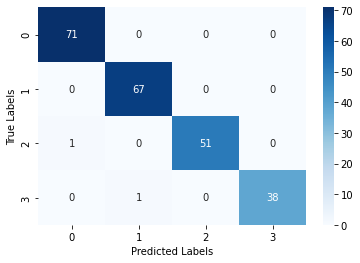

Feature 0: 0.04971103730493734
Feature 1: 0.005172906566161387
Feature 2: 0.006784873372993344
Feature 3: 0.0041079787355295765
Feature 4: 0.01665728189213265
Feature 5: 0.038952096528925256
Feature 6: 0.008894246113185957
Feature 7: 0.01219328551507606
Feature 8: 0.008752511820391731
Feature 9: 0.014478144869870082
Feature 10: 0.015097735598521601
Feature 11: 0.03411604176306903
Feature 12: 0.010540385823354943
Feature 13: 0.007569761191544036
Feature 14: 0.006746287790302974
Feature 15: 0.011350593709270558
Feature 16: 0.009478240779879325
Feature 17: 0.01290292755712932
Feature 18: 0.008233202574685213
Feature 19: 0.00513174895021802
Feature 20: 0.007358978391620094
Feature 21: 0.008971790791610248
Feature 22: 0.11326783498707338
Feature 23: 0.00886730275398513
Feature 24: 0.045678034280202014
Feature 25: 0.031802688321024106
Feature 26: 0.024108655371926368
Feature 27: 0.007607563617473024
Feature 28: 0.007030074839621088
Feature 29: 0.03564606892649693
Feature 30: 0.01113846960676

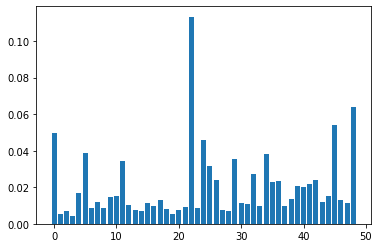

In [36]:
# Random Forest
# Classification 2
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [5, 10, 15, 20 ,25],
    'max_features': [0.5,'sqrt', 'log2', None]
}

X_train, X_val, y_train, y_val = train_test_split(
                        normalized_data, np.ravel(input_data['Treatment_Behavior']),
                test_size = 0.3, random_state = 101)
# Create a Random Forest classifier
RF_2 = RandomForestClassifier()

# Use GridSearchCV with 5-fold cross-validation to find the best hyperparameters
grid = GridSearchCV(RF_2, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid.best_params_)

Best_RF_2 = grid.best_estimator_
Best_RF_2.fit(X_train, y_train)

predictions = Best_RF_2.predict(X_val)
print(classification_report(y_val, predictions))


cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate the feature importance
Impt_Feat_Best_RF_2 = Best_RF_2.feature_importances_

for i in range(len(Impt_Feat_Best_RF_2)):
    print(f"Feature {i}: {Impt_Feat_Best_RF_2[i]}")

# Create a bar plot of the feature importance scores
plt.bar([x for x in range(len(Impt_Feat_Best_RF_2))], Impt_Feat_Best_RF_2)
plt.show()

7. See if removing some features systematically will improve your models (e.g. using recursive feature elimination https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html). [3]
8. Finally, test a few promising models on the test data: https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv [2]

We now import the testing datatset into the notebook & test the performance of the model on this data after performing the same data preprocessing steps & getting rid of the features that we eliminated in the training dataset.

In [38]:
testing_data = pd.read_csv(r'https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv',skiprows = 0)
test_data = testing_data.drop(['EGR1_N','H3MeK4_N','H3AcK18_N','BAD_N','BCL2_N'],axis=1)
test_data = test_data[test_data.columns[0:72]]
test_data.shape

(225, 72)

In [39]:
imputed_test_data = impute_it.fit_transform(test_data)
imputed_test_data = pd.DataFrame(imputed_test_data)
imputed_test_data.columns =['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'CaNA_N']

In [40]:
pre_processed_test_data = imputed_test_data.drop(low_variance_variables, axis=1)
pre_processed_test_data.shape

(225, 55)

In [41]:
pre_processed_test_data = pre_processed_test_data.drop(to_drop, axis=1)
pre_processed_test_data.shape

(225, 49)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_test_data = pd.DataFrame(scaler.fit_transform(pre_processed_test_data), columns=pre_processed_test_data.columns)

In [43]:
label1 = {'Control': 0,'Ts65Dn': 1}
testing_data['Genotype'] = [label1[item] for item in testing_data['Genotype']]

label2 = {'Memantine_C/S': 0, 'Memantine_S/C':1, 'Saline_C/S':2, 'Saline_S/C':3}
testing_data['Treatment_Behavior'] = [label2[item] for item in testing_data['Treatment_Behavior']]

Now all the models are applied on the testing data one by one & the corresponding classification report and confusion matrix is generated.

              precision    recall  f1-score   support

           0       0.86      0.70      0.78       135
           1       0.65      0.83      0.73        90

    accuracy                           0.76       225
   macro avg       0.76      0.77      0.75       225
weighted avg       0.78      0.76      0.76       225



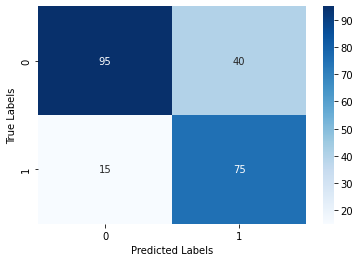

In [45]:
predictions=Best_Linear_SVM_1.predict(normalized_test_data)
print(classification_report(testing_data['Genotype'], predictions))

cm = confusion_matrix(testing_data['Genotype'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


              precision    recall  f1-score   support

           0       0.62      0.75      0.68        60
           1       0.90      1.00      0.94        60
           2       0.62      0.48      0.54        60
           3       0.97      0.84      0.90        45

    accuracy                           0.76       225
   macro avg       0.78      0.77      0.77       225
weighted avg       0.76      0.76      0.76       225



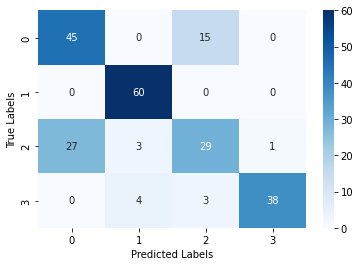

In [46]:
predictions=Best_Linear_SVM_2.predict(normalized_test_data)
print(classification_report(testing_data['Treatment_Behavior'], predictions))

cm = confusion_matrix(testing_data['Treatment_Behavior'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



              precision    recall  f1-score   support

           0       0.88      0.76      0.81       135
           1       0.70      0.84      0.76        90

    accuracy                           0.79       225
   macro avg       0.79      0.80      0.79       225
weighted avg       0.81      0.79      0.79       225



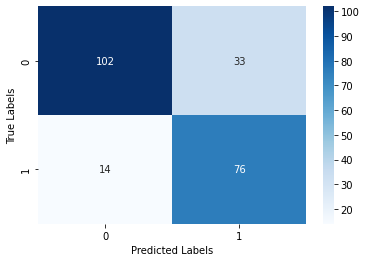

In [47]:
predictions=Best_Kernel_SVM_1.predict(normalized_test_data)
print(classification_report(testing_data['Genotype'], predictions))

cm = confusion_matrix(testing_data['Genotype'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



              precision    recall  f1-score   support

           0       0.73      0.92      0.81        60
           1       0.83      0.87      0.85        60
           2       0.89      0.67      0.76        60
           3       0.81      0.76      0.78        45

    accuracy                           0.80       225
   macro avg       0.81      0.80      0.80       225
weighted avg       0.81      0.80      0.80       225



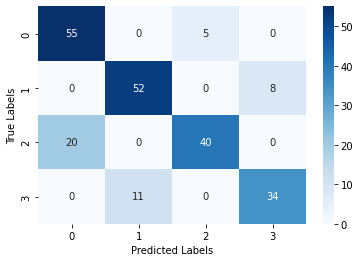

In [48]:
predictions=Best_Kernel_SVM_2.predict(normalized_test_data)
print(classification_report(testing_data['Treatment_Behavior'], predictions))

cm = confusion_matrix(testing_data['Treatment_Behavior'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


              precision    recall  f1-score   support

           0       0.89      0.72      0.80       135
           1       0.67      0.87      0.76        90

    accuracy                           0.78       225
   macro avg       0.78      0.79      0.78       225
weighted avg       0.80      0.78      0.78       225



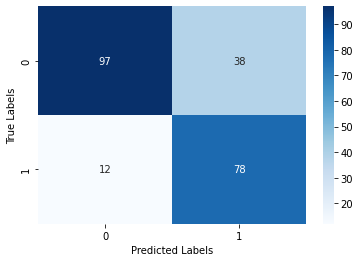

In [49]:
predictions=Best_NN_1.predict(normalized_test_data)
print(classification_report(testing_data['Genotype'], predictions))

cm = confusion_matrix(testing_data['Genotype'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



              precision    recall  f1-score   support

           0       0.76      0.98      0.86        60
           1       0.85      0.97      0.91        60
           2       0.91      0.68      0.78        60
           3       0.94      0.71      0.81        45

    accuracy                           0.84       225
   macro avg       0.87      0.84      0.84       225
weighted avg       0.86      0.84      0.84       225



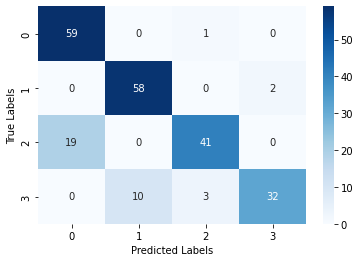

In [50]:
predictions=Best_NN_2.predict(normalized_test_data)
print(classification_report(testing_data['Treatment_Behavior'], predictions))


cm = confusion_matrix(testing_data['Treatment_Behavior'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       135
           1       0.65      0.68      0.66        90

    accuracy                           0.72       225
   macro avg       0.71      0.72      0.71       225
weighted avg       0.73      0.72      0.73       225



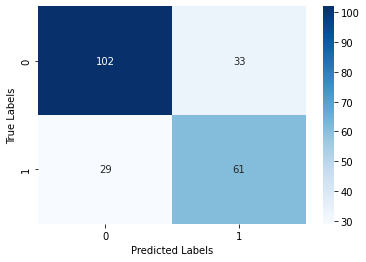

In [51]:
predictions=Best_RF_1.predict(normalized_test_data)
print(classification_report(testing_data['Genotype'], predictions))

cm = confusion_matrix(testing_data['Genotype'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

              precision    recall  f1-score   support

           0       0.71      0.70      0.71        60
           1       0.77      0.82      0.79        60
           2       0.70      0.72      0.71        60
           3       0.73      0.67      0.70        45

    accuracy                           0.73       225
   macro avg       0.73      0.72      0.73       225
weighted avg       0.73      0.73      0.73       225



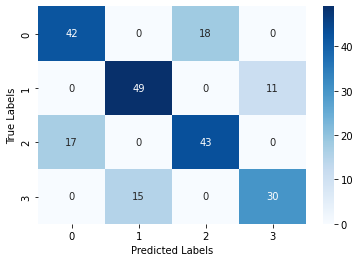

In [52]:
predictions=Best_RF_2.predict(normalized_test_data)
print(classification_report(testing_data['Treatment_Behavior'], predictions))

cm = confusion_matrix(testing_data['Treatment_Behavior'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

We now perform RFECV on the Linear SVM and Random Forest to eliminate the features recurively that dont have significant contribution to the accuracy.

The plot of accuarcy for RFECV is also plotted in the two cases.

While for the RBF Kernel SVM and Neural Network RFECV can not as such be used, as none of these estimators have an underlying coefficient or feature importnmce metric.

Hence for RBF Kernel SVM and Neural Networks the important features are selected as returned by the Feature Importance evaluation performed using Permutation Importance. 

Subsequently on the selected features either from RFECV or permutaion importamce, new models are trained and tested. 

These models built on fewer features show similar or better performace to those tested earlier on the larger set of features.

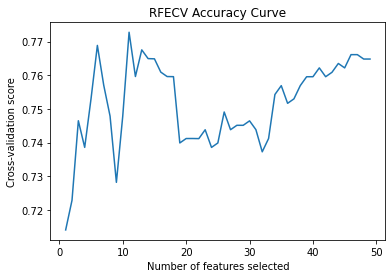

Optimal number of features : 11
Selected features:  [15, 16, 20, 21, 23, 29, 31, 33, 36, 41, 43]


In [53]:
# Linear SVM 1
# RFECV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC


X = normalized_data
y = input_data['Genotype']

# Create a recursive feature elimination object
rfecv = RFECV(estimator=Best_Linear_SVM_1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

# Plot the accuracy curve
plt.figure()
plt.title('RFECV Accuracy Curve')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Print the optimal number of features and the corresponding scores
print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected features: ", [i for i in range(len(rfecv.support_)) if rfecv.support_[i]])

In [54]:
X_Selected_SVM_1 = X.iloc[:, rfecv.support_]
Selected_SVM_1= SVC(kernel="linear")
Selected_SVM_1.fit(X_Selected_SVM_1, y)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       135
           1       0.73      0.87      0.79        90

    accuracy                           0.82       225
   macro avg       0.81      0.83      0.81       225
weighted avg       0.83      0.82      0.82       225



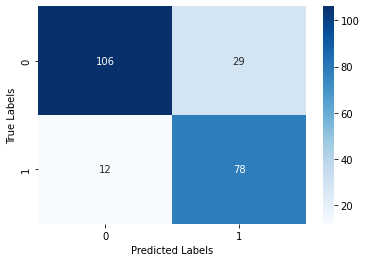

In [55]:
selected_test_data=normalized_test_data.iloc[:, rfecv.support_]
predictions=Selected_SVM_1.predict(selected_test_data)
print(classification_report(testing_data['Genotype'], predictions))

cm = confusion_matrix(testing_data['Genotype'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

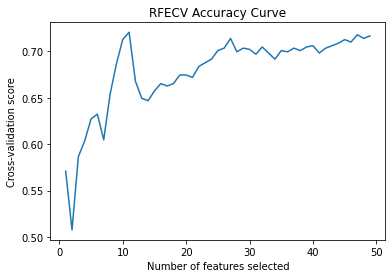

Optimal number of features : 11
Selected features:  [3, 5, 11, 16, 17, 22, 23, 25, 29, 34, 48]


In [56]:
# Linear SVM 2
# RFE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC


X = normalized_data
y = input_data['Treatment_Behavior']

# Create a recursive feature elimination object
rfecv = RFECV(estimator=Best_Linear_SVM_2, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

# Plot the accuracy curve
plt.figure()
plt.title('RFECV Accuracy Curve')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()


# Print the optimal number of features and the corresponding scores
print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected features: ", [i for i in range(len(rfecv.support_)) if rfecv.support_[i]])

In [57]:
X_Selected_SVM_2 = X.iloc[:, rfecv.support_]
Selected_SVM_2 = SVC(kernel="linear")
Selected_SVM_2.fit(X_Selected_SVM_2, y)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.58      0.82      0.68        60
           1       0.85      0.95      0.90        60
           2       0.70      0.43      0.54        60
           3       0.95      0.78      0.85        45

    accuracy                           0.74       225
   macro avg       0.77      0.74      0.74       225
weighted avg       0.76      0.74      0.73       225



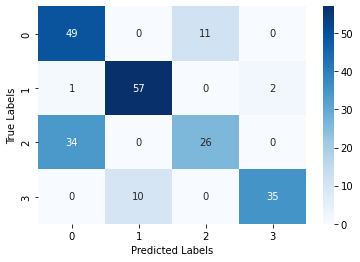

In [58]:
selected_test_data=normalized_test_data.iloc[:, rfecv.support_]
predictions=Selected_SVM_2.predict(selected_test_data)
print(classification_report(testing_data['Treatment_Behavior'], predictions))


cm = confusion_matrix(testing_data['Treatment_Behavior'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [59]:
X = normalized_data
y = input_data['Genotype']
# slecting importnae featres from Kernel SVM using permutation importmce bar plot
Impt_Feat_Kernel_SVM_1=[False, False, False, False, False, False, False, False, True,
                        False, True,  False, False, False, False, False,  False,  False,
                        False, False, True, True,  False, True,  False, False, True,   True,
                        False, False, False, True, False, False, False,  False, False,
                        False, False, False, True, True, False, False, False, True,
                        False, False,  True]
X_Selected_Kernel_SVM_1 = X.iloc[:, Impt_Feat_Kernel_SVM_1]
Selected_Kernel_SVM_1= SVC(kernel="rbf")
Selected_Kernel_SVM_1.fit(X_Selected_Kernel_SVM_1, y)

SVC()

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       135
           1       0.80      0.78      0.79        90

    accuracy                           0.84       225
   macro avg       0.83      0.83      0.83       225
weighted avg       0.83      0.84      0.84       225



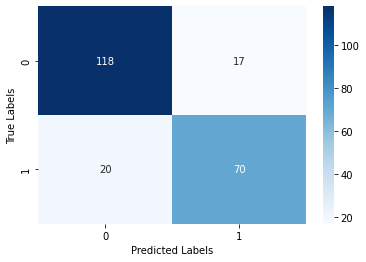

In [60]:
selected_test_data=normalized_test_data.iloc[:, Impt_Feat_Kernel_SVM_1]
predictions=Selected_Kernel_SVM_1.predict(selected_test_data)
print(classification_report(testing_data['Genotype'], predictions))


cm = confusion_matrix(testing_data['Genotype'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        60
           1       0.81      0.92      0.86        60
           2       0.87      0.75      0.80        60
           3       0.86      0.71      0.78        45

    accuracy                           0.82       225
   macro avg       0.83      0.82      0.82       225
weighted avg       0.83      0.82      0.82       225



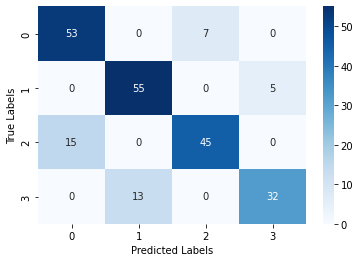

In [61]:
X = normalized_data
y = input_data['Treatment_Behavior']

# slecting importnae featres from Kernel SVM using permutation importmce bar plot
Impt_Feat_Kernel_SVM_2=[True, True, False, True, False, True, True, False, False,
                        False, False,  True, False, False, True, False,  False,  False,
                        True, False, True, True,  False, False,  False, False, False,   False,
                        False, True, False, False, False, False, False,  False, False,
                        True, False, False, False, False, False, False, False, True,
                        True, False,  False]
X_Selected_Kernel_SVM_2 = X.iloc[:, Impt_Feat_Kernel_SVM_2]
Selected_Kernel_SVM_2= SVC(kernel="rbf")
Selected_Kernel_SVM_2.fit(X_Selected_Kernel_SVM_2, y)

selected_test_data=normalized_test_data.iloc[:, Impt_Feat_Kernel_SVM_2]
predictions=Selected_Kernel_SVM_2.predict(selected_test_data)
print(classification_report(testing_data['Treatment_Behavior'], predictions))


cm = confusion_matrix(testing_data['Treatment_Behavior'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       135
           1       0.70      0.84      0.77        90

    accuracy                           0.80       225
   macro avg       0.79      0.80      0.79       225
weighted avg       0.81      0.80      0.80       225



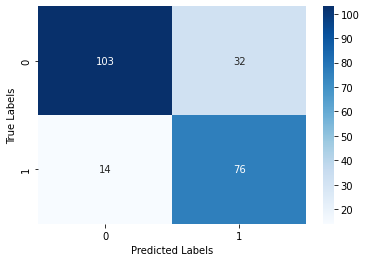

In [62]:
X = normalized_data
y = input_data['Genotype']
# slecting importnae featres from NN using permutation importmce bar plot

Impt_Feat_NN_1=[        False, False, False, False, False, False, False, False, False,
                        False, False,  False, False, False, False, False,  True, False,
                        False, False, True, True, False, True,  False, False, True,   True,
                        False, False, True, True, False, False, False,
                        False, False, False, False, False, False, True,
                        False, False,  False, True, False, True, False]
X_Selected_NN_1 = X.iloc[:, Impt_Feat_NN_1]
Selected_NN_1 = MLPClassifier(activation='relu', solver='adam', max_iter=10000, random_state=42)
Selected_NN_1.fit(X_Selected_NN_1, y)

selected_test_data=normalized_test_data.iloc[:, Impt_Feat_NN_1]
predictions=Selected_NN_1.predict(selected_test_data)
print(classification_report(testing_data['Genotype'], predictions))


cm = confusion_matrix(testing_data['Genotype'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        60
           1       0.82      0.93      0.87        60
           2       0.91      0.65      0.76        60
           3       0.89      0.73      0.80        45

    accuracy                           0.82       225
   macro avg       0.84      0.81      0.81       225
weighted avg       0.83      0.82      0.81       225



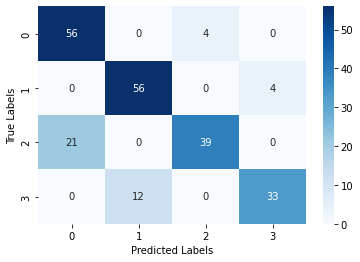

In [63]:
X = normalized_data
y = input_data['Treatment_Behavior']

# slecting importnae featres from NN 2 using permutation importmce bar plot

Impt_Feat_NN_2=[        False, True, False, True, False, True, False, False, False,
                        False, False,  True, False, False, True, False,  False,  True,
                        False, True, True, True, False, True,  False, True, False,   False,
                        False, True, False, True, False, False, False,  True, False,
                        True, False, False, False, True, False, False, False, False,
                        True, False,  False]
X_Selected_NN_2 = X.iloc[:, Impt_Feat_NN_2]
Selected_NN_2 = MLPClassifier(activation='relu', solver='adam', max_iter=10000, random_state=42)
Selected_NN_2.fit(X_Selected_NN_2, y)

selected_test_data=normalized_test_data.iloc[:, Impt_Feat_NN_2]
predictions=Selected_NN_2.predict(selected_test_data)
print(classification_report(testing_data['Treatment_Behavior'], predictions))

cm = confusion_matrix(testing_data['Treatment_Behavior'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

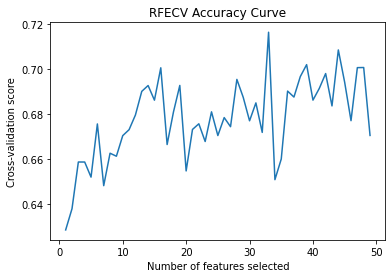

Optimal number of features : 33
Selected features:  [0, 4, 5, 6, 11, 12, 15, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 40, 41, 43, 44, 45, 46, 47, 48]


In [64]:
# RF 1
# RFECV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC


X = normalized_data
y = input_data['Genotype']

# Create a recursive feature elimination object
rfecv = RFECV(estimator=Best_RF_1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

# Plot the accuracy curve
plt.figure()
plt.title('RFECV Accuracy Curve')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Print the optimal number of features and the corresponding scores
print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected features: ", [i for i in range(len(rfecv.support_)) if rfecv.support_[i]])

In [65]:
X_Selected_RF_1 = X.iloc[:, rfecv.support_]
Selected_RF_1 = RandomForestClassifier()
Selected_RF_1.fit(X_Selected_RF_1, y)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       135
           1       0.66      0.69      0.67        90

    accuracy                           0.73       225
   macro avg       0.72      0.73      0.72       225
weighted avg       0.74      0.73      0.73       225



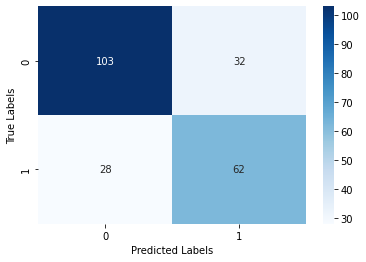

In [66]:
selected_test_data=normalized_test_data.iloc[:, rfecv.support_]
predictions=Selected_RF_1.predict(selected_test_data)
print(classification_report(testing_data['Genotype'], predictions))

cm = confusion_matrix(testing_data['Genotype'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

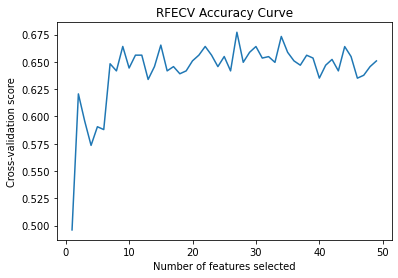

Optimal number of features : 27
Selected features:  [0, 4, 5, 6, 8, 9, 11, 15, 17, 22, 24, 25, 26, 29, 32, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 47, 48]


In [67]:
# RF 2
# RFECV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC


X = normalized_data
y = input_data['Treatment_Behavior']

# Create a recursive feature elimination object
rfecv = RFECV(estimator=Best_RF_2, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

# Plot the accuracy curve
plt.figure()
plt.title('RFECV Accuracy Curve')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Print the optimal number of features and the corresponding scores
print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected features: ", [i for i in range(len(rfecv.support_)) if rfecv.support_[i]])

In [68]:
X_Selected_RF_2 = X.iloc[:, rfecv.support_]
Selected_RF_2 = RandomForestClassifier()
Selected_RF_2.fit(X_Selected_RF_2, y)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.68      0.73      0.70        60
           1       0.74      0.77      0.75        60
           2       0.71      0.65      0.68        60
           3       0.67      0.64      0.66        45

    accuracy                           0.70       225
   macro avg       0.70      0.70      0.70       225
weighted avg       0.70      0.70      0.70       225



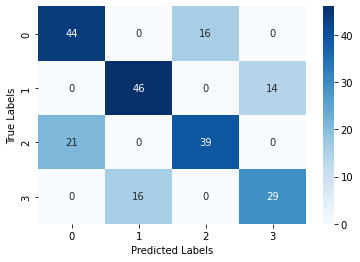

In [69]:
selected_test_data=normalized_test_data.iloc[:, rfecv.support_]
predictions=Selected_RF_2.predict(selected_test_data)
print(classification_report(testing_data['Treatment_Behavior'], predictions))

cm = confusion_matrix(testing_data['Treatment_Behavior'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()